## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
import statsmodels.formula.api as sm

## Importing data

In [3]:
data = pd.read_csv('listings_detail.csv', low_memory = False)

In [4]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211102175544,2021-11-03,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211102175544,2021-11-03,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.81,4.72,4.65,NaN,f,1,1,0,0,4.91
2,5121,https://www.airbnb.com/rooms/5121,20211102175544,2021-11-03,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.53


## Explaratory Data Analysis

In [5]:
len(data)
# our data set has 37k rows and 74 columns

37713

In [6]:
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

After loading the dataset we can see a number of things. These 74 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

## Understadning, Wrangling and Cleaning Data

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

In [7]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
data.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              13
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9212
Length: 74, dtype: int64

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns There are irrelevant and insignificant columns to our data analysis. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [8]:
data['bedrooms'] = pd.to_numeric(data['bedrooms'],errors='coerce')
data['beds']=pd.to_numeric(data['beds'],errors='coerce')

##### Examining amenities

In [9]:
l = data['amenities'][0][1:-1].split(",")

In [10]:
l = [i.replace('"', '') for i in l]
l = [x.strip(' ') for x in l]

In [11]:
for item in l:
    item = item.strip('"')
    
l[1]

'Dedicated workspace'

In [12]:
l

['Bathtub',
 'Dedicated workspace',
 'Hair dryer',
 'Fire extinguisher',
 'TV',
 'Carbon monoxide alarm',
 'Dishes and silverware',
 'Keypad',
 'Free street parking',
 'Hot water',
 'Essentials',
 'Paid parking off premises',
 'Luggage dropoff allowed',
 'Ethernet connection',
 'Long term stays allowed',
 'Cleaning before checkout',
 'Smoke alarm',
 'Kitchen',
 'Refrigerator',
 'Cooking basics',
 'Coffee maker',
 'Bed linens',
 'Stove',
 'Hangers',
 'Oven',
 'Iron',
 'Wifi',
 'Extra pillows and blankets',
 'Air conditioning',
 'Baking sheet',
 'Heating']

In [13]:
#make a list of all values in amenities
combo_list = []
for row in range(len(data)):
    current_string = data.loc[row, 'amenities']
    current_list = current_string[1:-1].split(",")
    current_list = [i.replace('"', '') for i in current_list]
    current_list = [i.strip(' ') for i in current_list]
    combo_list = combo_list + current_list

len(list(pd.unique(combo_list)))

2458

In [14]:
import string
stopwords_list = list(string.punctuation)

In [15]:
combo_list = [word for word in combo_list if word not in stopwords_list]
combo_list

['Bathtub',
 'Dedicated workspace',
 'Hair dryer',
 'Fire extinguisher',
 'TV',
 'Carbon monoxide alarm',
 'Dishes and silverware',
 'Keypad',
 'Free street parking',
 'Hot water',
 'Essentials',
 'Paid parking off premises',
 'Luggage dropoff allowed',
 'Ethernet connection',
 'Long term stays allowed',
 'Cleaning before checkout',
 'Smoke alarm',
 'Kitchen',
 'Refrigerator',
 'Cooking basics',
 'Coffee maker',
 'Bed linens',
 'Stove',
 'Hangers',
 'Oven',
 'Iron',
 'Wifi',
 'Extra pillows and blankets',
 'Air conditioning',
 'Baking sheet',
 'Heating',
 'Microwave',
 'Oven',
 'Pack \\u2019n play/Travel crib',
 'Air conditioning',
 'Smoke alarm',
 'Cable TV',
 'Refrigerator',
 'Lockbox',
 'Hair dryer',
 'Kitchen',
 'Coffee maker',
 'Carbon monoxide alarm',
 'Extra pillows and blankets',
 'Stove',
 'Children\\u2019s books and toys',
 'Free parking on premises',
 'Luggage dropoff allowed',
 'Fire extinguisher',
 'Hangers',
 'Long term stays allowed',
 'Hot water',
 'Cooking basics',
 'H

In [16]:
#find all unique values in combo_list --> will give us unique values in amenities
amen_list = list(pd.unique(combo_list))

In [17]:
len(amen_list)

2458

In [18]:
# create a column for each amenity and assign 0 to all rows
for item in amen_list:
    data[item] = 0

In [19]:
# assign 1 for each listing that has the unique amenity in the respective column
for item in amen_list:
    for row in range(len(data)):
        if item in data.loc[row, 'amenities']:
            data.loc[row, item] = 1

In [20]:
# create a new data frame, that has the price of each listing and the amenities
new = data.iloc[:,74:]
new['price'] = data['price']

In [21]:
# sort new by price descending --> show the most expensive listings at first and what amenities they have
new = new.sort_values(by = 'price', ascending = False)

In [22]:
# Take the first 3000 and the last 3000 entries and create a data frame for each 
n = 3000

high_price = new.iloc[:n+1,:]
low_price = new.iloc[-n+1:,:]

high_price['Pricing Category'] = 'High'
low_price['Pricing Category'] = 'Low'

analysis = pd.concat([high_price, low_price])

<ipython-input-22-2ae53a4f5110>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_price['Pricing Category'] = 'High'
<ipython-input-22-2ae53a4f5110>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_price['Pricing Category'] = 'Low'


In [23]:
analysis['price']  = analysis[['price']].replace('[\$,]', '', regex=True).astype(float)
# analysis2 = analysis[(analysis['price'] > 10) & (analysis['price'] < 3000)]
#removed outliers from price using IQR
Q1=analysis['price'].quantile(0.25) 
Q3=analysis['price'].quantile(0.75) 
IQR=Q3-Q1 
analysis2=analysis[~(analysis['price']>(Q3+1.5*IQR))]

In [24]:
analysis2 = analysis2._get_numeric_data()

In [25]:
analysis2 = analysis.reset_index().drop('index', axis =1)

In [26]:
analysis2

,Bathtub,Dedicated workspace,Hair dryer,Fire extinguisher,TV,Carbon monoxide alarm,Dishes and silverware,Keypad,Free street parking,Hot water,...,no conditioner,no refrigerator,whirlpool oven,Blomberg stainless steel oven,Allafia Good Soap fair trade body soap,Bloomberg stainless steel electric stove,Echo Show Bluetooth sound system,General Electric stainless steel stove,price,Pricing Category
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,999.0,High
1,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,999.0,High
2,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,999.0,High
3,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,999.0,High
4,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,999.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Low
5996,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Low
5997,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Low
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,Low


In [27]:
diff_dict = {}

for col in list(analysis2.columns)[:-2]:
    highs = analysis2[analysis2['Pricing Category'] == 'High']
    lows = analysis2[analysis2['Pricing Category'] == 'Low']
    
    high_mean = highs[col].mean()
    low_mean = lows[col].mean()
        
    diff = high_mean - low_mean
    
    diff_dict[col] = diff

In [28]:
#diff_dict = dict(filter(lambda elem: elem[1]>0 , diff_dict.items()))

In [29]:
amenities = pd.Series(list(diff_dict.keys()))
mean_diffs = pd.Series(list(diff_dict.values()))

In [30]:
means_df = pd.concat([amenities, mean_diffs], axis = 1)
means_df.columns = ["Amenities", "Mean Difference"]

In [31]:
means_df = means_df.sort_values(by = 'Mean Difference', ascending = False)

In [32]:
means_df.head(50)

,Amenities,Mean Difference
51,Lock on bedroom door,0.100189
8,Free street parking,0.067409
38,Shampoo,0.058252
69,First aid kit,0.057757
5,Carbon monoxide alarm,0.057179
2,Hair dryer,0.054578
19,Cooking basics,0.051702
6,Dishes and silverware,0.049344
31,Microwave,0.048058
18,Refrigerator,0.048034


In [33]:
top50 = pd.DataFrame(means_df.head(50), columns = ['Amenities'])

In [34]:
top50list = []
top50list.extend(top50['Amenities'].tolist())
print(top50list)

['Lock on bedroom door', 'Free street parking', 'Shampoo', 'First aid kit', 'Carbon monoxide alarm', 'Hair dryer', 'Cooking basics', 'Dishes and silverware', 'Microwave', 'Refrigerator', 'Hot water', 'Bed linens', 'Smoke alarm', 'Dedicated workspace', 'Iron', 'Essentials', 'linens', 'Stove', 'Luggage dropoff allowed', 'Coffee maker', 'Hangers', 'Extra pillows and blankets', 'Private entrance', 'Oven', 'Fire extinguisher', 'Host greets you', 'Laundromat nearby', 'Wifi', 'Shower gel', 'Clothing storage', 'Security cameras on property', 'table', 'Cleaning products', 'Smart lock', 'Dining table', 'Window AC unit', 'Free parking on premises', 'Outdoor dining area', 'Central heating', 'Outdoor furniture', 'Portable fans', 'Bathtub', 'BBQ grill', 'Body soap', 'Clothing storage: closet', 'Lockbox', 'closet', 'Paid parking off premises', 'Room-darkening shades', 'Drying rack for clothing']


In [35]:
top50

,Amenities
51,Lock on bedroom door
8,Free street parking
38,Shampoo
69,First aid kit
5,Carbon monoxide alarm
2,Hair dryer
19,Cooking basics
6,Dishes and silverware
31,Microwave
18,Refrigerator


In [36]:
col_keep = ['id', 'host_id', 'host_since' ,
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed' ,\
        'neighbourhood_cleansed','room_type', 'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', \
        'instant_bookable', 'calculated_host_listings_count', 'Lock on bedroom door',\
        'Free street parking', 'First aid kit', 'Shampoo', 'Carbon monoxide alarm',\
        'Hair dryer', 'Cooking basics', 'Dishes and silverware', 'Refrigerator',\
        'Microwave', 'Hot water', 'Bed linens', 'Dedicated workspace', 'Smoke alarm',\
        'linens', 'Iron', 'Essentials', 'Stove', 'Fire extinguisher', \
        'Luggage dropoff allowed', 'Coffee maker', 'Extra pillows and blankets', \
        'Wifi', 'Host greets you', 'Hangers', 'Private entrance', \
        'Security cameras on property', 'Oven', 'Shower gel', 'Clothing storage', \
        'Laundromat nearby', 'Smart lock', 'table', 'Free parking on premises', \
        'Dining table', 'Cleaning products', 'Outdoor dining area', 'BBQ grill', \
        'Window AC unit', 'Central heating', 'Outdoor furniture', 'Lockbox', \
        'Portable fans', 'Room-darkening shades', 'Drying rack for clothing', \
        'Clothing storage: closet', 'closet', 'Body soap', 'Shared fenced garden or backyard', \
        'Paid parking off premises']

In [37]:
data = data.loc[:,col_keep]

#### Dealing with null values

In [38]:
#dropping null values in 'review_scores_rating', 'host_since'
data = data.dropna(subset=['review_scores_rating', 'host_since'])
# replace missing values with the mode 'within an hour' for variable 'host_response_time'
data['host_response_time']=data['host_response_time'].fillna('within an hour')
# replace missing values with the median for variable 'host_response_rate'
data['host_response_rate']=data['host_response_rate'].fillna(data['host_response_rate'].median)
# replace missing values with the median for variable 'host_acceptance_rate'
data['host_acceptance_rate']=data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].median)
# replace missing values with the median for variable 'bedrooms'
data['bedrooms']=data['bedrooms'].fillna(data['bedrooms'].median)
# replace missing values with the median for variable 'beds'
data['beds']=data['beds'].fillna(data['beds'].median)

In [39]:
data.isnull().sum()

id                                  0
host_id                             0
host_since                          0
host_response_time                  0
host_response_rate                  0
                                   ..
Clothing storage: closet            0
closet                              0
Body soap                           0
Shared fenced garden or backyard    0
Paid parking off premises           0
Length: 74, dtype: int64

##### Formatting Price  and dealing with price outliers

In [40]:
data['price']  = data[['price']].replace('[\$,]', '', regex=True).astype(float)
#removed outliers from price using IQR
Q1=data['price'].quantile(0.25) 
Q3=data['price'].quantile(0.75) 
IQR=Q3-Q1 
data=data[~(data['price']>(Q3+1.5*IQR))]

##### Exploring neighborhood groups

In [41]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
data.neighbourhood_group_cleansed.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

##### Exploring room type

In [42]:
#examining the unique values of room_type as this column will appear very handy for later analysis
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

##### Exploring neighborhood

In [43]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(data.neighbourhood_cleansed.unique())

220

## Exploring and Visualizing Data
Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results

Now that we are ready for an exploration of our data, we can make a rule that we are going to be working from left to right. The reason some may prefer to do this is due to its set approach - some datasets have a big number of attributes, plus this way we will remember to explore each column individually to make sure we learn as much as we can about our dataset.

In [44]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=data.host_id.value_counts().head(10)
top_host

158969505    152
51501835     146
137358866    112
371972456    104
61391963      91
120762452     67
19303369      57
334163301     55
394817730     46
204704622     46
Name: host_id, dtype: int64

In [45]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [46]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,158969505,152
1,51501835,146
2,137358866,112
3,371972456,104
4,61391963,91
5,120762452,67
6,19303369,57
7,334163301,55
8,394817730,46
9,204704622,46


[Text(0, 0, '19303369'),
 Text(1, 0, '51501835'),
 Text(2, 0, '61391963'),
 Text(3, 0, '120762452'),
 Text(4, 0, '137358866'),
 Text(5, 0, '158969505'),
 Text(6, 0, '204704622'),
 Text(7, 0, '334163301'),
 Text(8, 0, '371972456'),
 Text(9, 0, '394817730')]

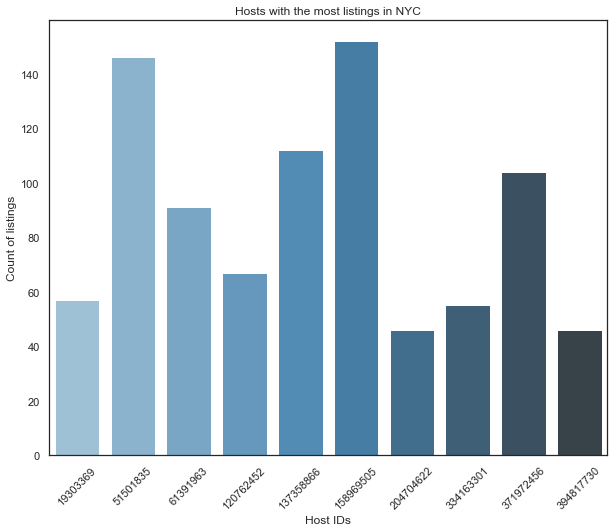

In [47]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [48]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=data.loc[data['neighbourhood_group_cleansed'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=data.loc[data['neighbourhood_group_cleansed'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=data.loc[data['neighbourhood_group_cleansed'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=data.loc[data['neighbourhood_group_cleansed'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=data.loc[data['neighbourhood_group_cleansed'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [49]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

In [50]:
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,10.0,11.0
25%,62.0,89.0,52.0,60.0,50.0
50%,98.0,130.0,76.0,89.0,70.0
75%,150.0,185.0,117.0,126.5,110.0
max,335.0,335.0,334.0,299.0,325.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

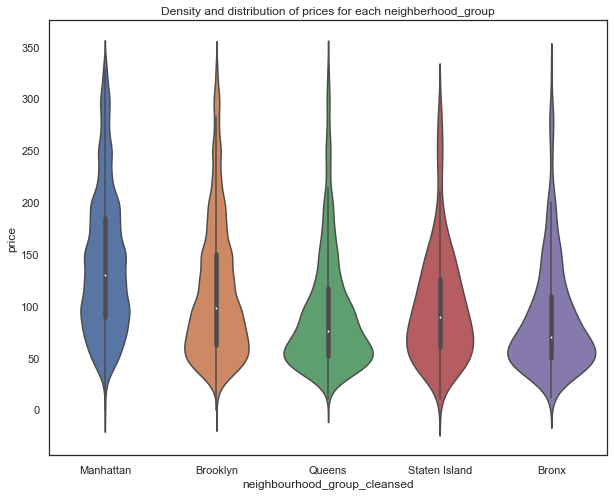

In [51]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=data[data.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group_cleansed', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with 143 price as average observation, followed by Brooklyn with 100 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

In [52]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
data.neighbourhood_cleansed.value_counts().head(10)

Bedford-Stuyvesant    2098
Williamsburg          1915
Harlem                1470
Bushwick              1209
Upper West Side        951
Hell's Kitchen         945
Crown Heights          921
Upper East Side        902
East Village           844
Midtown                844
Name: neighbourhood_cleansed, dtype: int64

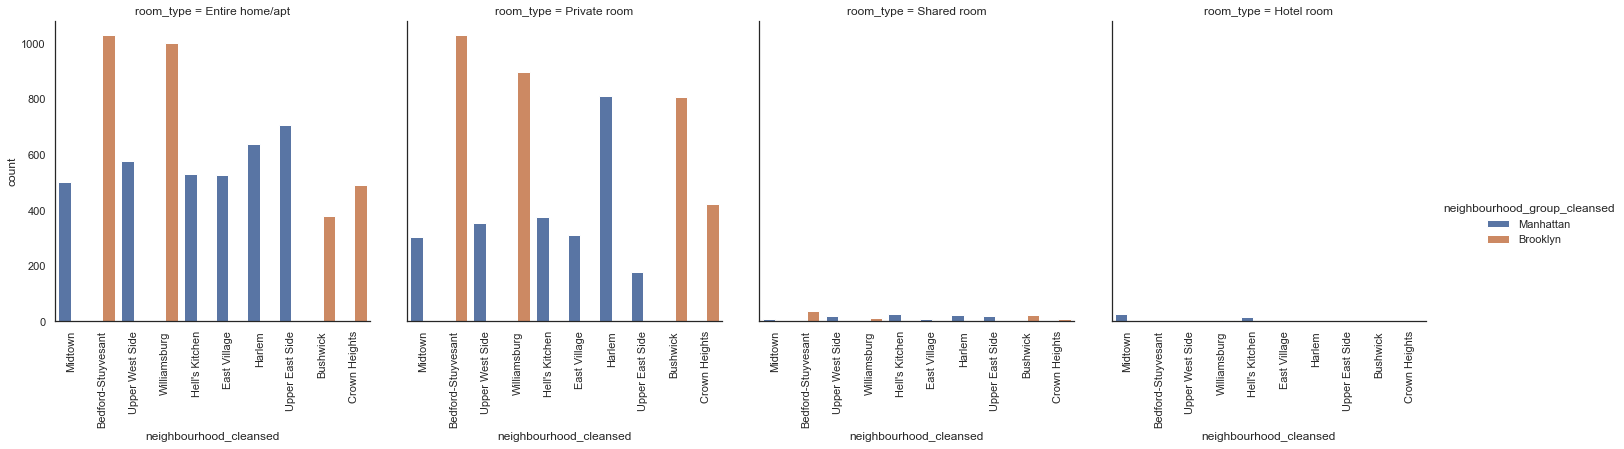

In [53]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhood_cleanseds for sub-dataframe
sub_7=data.loc[data['neighbourhood_cleansed'].isin(['Bedford-Stuyvesant','Williamsburg','Harlem','Bushwick',
                 'Hell\'s Kitchen','Upper West Side','Midtown','Upper East Side','Crown Heights', 'East Village'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood_cleansed', hue='neighbourhood_group_cleansed', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

Let' breakdown on what we can see from this plot. First, we can see that our plot consists of 4 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' and 'Hotel room' type Airbnb listings is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

#### Prepare data for analysis
Create dummy variables

##### Formatting Price

In [54]:
#data['price']  = data[['price']].replace('[\$,]', '', regex=True).astype(float)

##### Converting % to float

In [55]:
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100.0
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

##### Convert variables to numeric

In [56]:
data['bedrooms'] = pd.to_numeric(data['bedrooms'],errors='coerce')
data['beds']=pd.to_numeric(data['beds'],errors='coerce')

##### Creating dummy variables for amenities

In [57]:
data.columns.get_loc('Lock on bedroom door')

24

In [58]:
data.columns.tolist()

['id',
 'host_id',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'neighbourhood_cleansed',
 'room_type',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'instant_bookable',
 'calculated_host_listings_count',
 'Lock on bedroom door',
 'Free street parking',
 'First aid kit',
 'Shampoo',
 'Carbon monoxide alarm',
 'Hair dryer',
 'Cooking basics',
 'Dishes and silverware',
 'Refrigerator',
 'Microwave',
 'Hot water',
 'Bed linens',
 'Dedicated workspace',
 'Smoke alarm',
 'linens',
 'Iron',
 'Essentials',
 'Stove',
 'Fire extinguisher',
 'Luggage dropoff allowed',
 'Coffee maker',
 'Extra pillows and blankets',
 'Wifi',
 'Host greets you',
 'Hangers',
 'Private entrance',
 'Security cameras on property',
 'Oven',
 

In [59]:
data = pd.get_dummies(data=data, columns=data.columns[24:], drop_first=True)

##### Dummy variables for 'host_response_time' variable

In [60]:
data['a_few_days_or_more']=[1 if i=='a few days or more' else 0 for i in data['host_response_time']]
data['within_a_day']=[1 if i=='within a day' else 0 for i in data['host_response_time']]
data['within_a_few_hours']=[1 if i=='within a few hours' else 0 for i in data['host_response_time']]
data['host_response_time'].unique()

array(['a few days or more', 'within a few hours', 'within a day',
       'within an hour'], dtype=object)

##### Dummy variables for 'room_type' variable

In [61]:
data['Hotel_room']=[1 if x == "Hotel room" else 0 for x in data["room_type"]]
data['Private_room']=[1 if x == "Private room" else 0 for x in data["room_type"]]
data['Entire_home_apt']=[1 if x == "Entire home/apt" else 0 for x in data["room_type"]]

##### Dummy variables for 'neighbourhood_group_cleansed' variable

In [62]:
#unique values = Bronx, Brooklyn, Manhattan ,Queens ,Staten Island
data['Bronx']=[1 if i=='Bronx' else 0 for i in data['neighbourhood_group_cleansed']]
data['Brooklyn']=[1 if i=='Brooklyn' else 0 for i in data['neighbourhood_group_cleansed']]
data['Queens']=[1 if i=='Queens' else 0 for i in data['neighbourhood_group_cleansed']]
data['Staten_Island']=[1 if i=='Staten Island' else 0 for i in data['neighbourhood_group_cleansed']]

##### Dummy variables for 'host_has_profile_pic' varibale

In [63]:
data['host_is_superhost_t']=[1 if x == "t" else 0 for x in data["host_is_superhost"]]

##### Dummy variables for 'instant_bookable' varibale

In [64]:
data['instant_bookable_t']=[1 if x == "t" else 0 for x in data["instant_bookable"]]

##### Dummy variables for 'host_has_profile_pic' varibale

In [65]:
data['host_has_profile_pic_t']=[1 if x == "t" else 0 for x in data["host_has_profile_pic"]]

##### Dummy variables for 'host_identity_verified' varibale

In [66]:
data['host_identity_verified_t'] = [1 if x == "t" else 0 for x in data["host_identity_verified"]]

##### Convert 'host_since' to number of years

In [67]:
data['host_since']=pd.to_datetime(data['host_since'])
data['days']=(pd.to_datetime('2021-11-28')-data['host_since'])
data['Years']=round(data['days'].map(lambda x:x.days)/365,2)

In [68]:
data.columns = data.columns.str.replace(' ', '_')

In [69]:
data.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed',
       'neighbourhood_cleansed', 'room_type', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count', 'Lock_on_bedroom_door_1',
       'Free_street_parking_1', 'First_aid_kit_1', 'Shampoo_1',
       'Carbon_monoxide_alarm_1', 'Hair_dryer_1', 'Cooking_basics_1',
       'Dishes_and_silverware_1', 'Refrigerator_1', 'Microwave_1',
       'Hot_water_1', 'Bed_linens_1', 'Dedicated_workspace_1', 'Smoke_alarm_1',
       'linens_1', 'Iron_1', 'Essentials_1', 'Stove_1', 'Fire_extinguisher_1',
       'Luggage_dropoff_allowed_1', 'Coffee_maker_1',
       'Extra_pillows_and_blankets_1', 'W

#### Run Models

##### Regression 1

In [70]:
result1 = sm.ols(formula="price ~ host_response_rate+ host_acceptance_rate\
+host_listings_count+ minimum_nights+maximum_nights+ review_scores_rating\
+ number_of_reviews+ a_few_days_or_more+ within_a_day+ within_a_few_hours+ Hotel_room+ Private_room+ \
Entire_home_apt+host_is_superhost_t+ instant_bookable_t+ Years + Bronx+ Brooklyn+ Queens+ Staten_Island", data=data).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     456.5
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:50:15   Log-Likelihood:                -77596.
No. Observations:               14303   AIC:                         1.552e+05
Df Residuals:                   14282   BIC:                         1.554e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               89.7268 

In [71]:
result2 = sm.ols(formula="price ~ host_response_rate+ host_acceptance_rate\
+host_listings_count+ minimum_nights+maximum_nights+ review_scores_rating\
+ number_of_reviews+ a_few_days_or_more+ within_a_day+ within_a_few_hours+ Hotel_room+ Private_room+ \
Entire_home_apt+host_is_superhost_t+ instant_bookable_t+ Years + Bronx+ Brooklyn+ \
Queens+ Staten_Island+\
Lock_on_bedroom_door_1+Free_street_parking_1+ First_aid_kit_1+ Shampoo_1+\
Carbon_monoxide_alarm_1+ Hair_dryer_1+ Cooking_basics_1+Dishes_and_silverware_1+ \
Refrigerator_1+ Microwave_1+Hot_water_1+ Bed_linens_1+ Dedicated_workspace_1+ \
Smoke_alarm_1+linens_1+ Iron_1+ Essentials_1+ Stove_1+ Fire_extinguisher_1+\
Luggage_dropoff_allowed_1+ Coffee_maker_1+Extra_pillows_and_blankets_1+ Wifi_1+ \
Host_greets_you_1+Hangers_1+ Private_entrance_1+ Security_cameras_on_property_1+ \
Oven_1+ Shower_gel_1+ Clothing_storage_1+ Laundromat_nearby_1+\
Smart_lock_1+ table_1+ Free_parking_on_premises_1+\
Dining_table_1+ Cleaning_products_1+ Outdoor_dining_area_1+BBQ_grill_1+ \
Window_AC_unit_1+ Central_heating_1+Outdoor_furniture_1+ Lockbox_1+ Portable_fans_1+\
+ Drying_rack_for_clothing_1+ \
closet_1+ Body_soap_1+Shared_fenced_garden_or_backyard_1+ Paid_parking_off_premises_1", data=data).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:50:15   Log-Likelihood:                -77058.
No. Observations:               14303   AIC:                         1.543e+05
Df Residuals:                   14234   BIC:                         1.548e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

##### Model 3
Keeping only significant variables p<0.05

In [72]:
result3 = sm.ols(formula="price ~ host_response_rate+ host_acceptance_rate\
+host_listings_count+ minimum_nights+ review_scores_rating\
+ number_of_reviews+ a_few_days_or_more+ within_a_day+ within_a_few_hours+ Hotel_room+ Private_room+ \
Entire_home_apt+ instant_bookable_t + Bronx+ Brooklyn+ \
Queens+ Staten_Island+Lock_on_bedroom_door_1+Free_street_parking_1+ Shampoo_1+ Hair_dryer_1+\
Dishes_and_silverware_1+ Microwave_1+ Bed_linens_1+ Dedicated_workspace_1+ \
Essentials_1+ Stove_1+ Fire_extinguisher_1+Luggage_dropoff_allowed_1+Coffee_maker_1+ Wifi_1+ Host_greets_you_1+\
Hangers_1+ Security_cameras_on_property_1+Oven_1+ Shower_gel_1+ Laundromat_nearby_1+BBQ_grill_1+\
Central_heating_1+Outdoor_furniture_1+ Lockbox_1+ Body_soap_1+Shared_fenced_garden_or_backyard_1+ Paid_parking_off_premises_1", data=data).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     245.4
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:50:16   Log-Likelihood:                -77099.
No. Observations:               14303   AIC:                         1.543e+05
Df Residuals:                   14258   BIC:                         1.546e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [73]:
# removed variables:
# maximum_nights, host_is_superhost_t, Years, First_aid_kit_1, Carbon_monoxide_alarm_1, Cooking_basics_1, Hot_water_1, Smoke_alarm_1, Iron_1, Extra_pillows_and_blankets_1, Private_entrance_1, Clothing_storage_1, table_1, Refrigerator_1, Window_AC_unit_1

##### Model 4
Making interaction terms betweeen review_scores_rating and each dummy variable relating to neighbourhood group cleansed

In [74]:
result4 = sm.ols(formula="price ~ review_scores_rating*Bronx+ review_scores_rating*Brooklyn+ review_scores_rating*Queens +review_scores_rating*Staten_Island + host_response_rate+ host_acceptance_rate\
+host_listings_count+ minimum_nights+\
+ number_of_reviews+ a_few_days_or_more+ within_a_day+ within_a_few_hours+ Hotel_room+ Private_room+ \
Entire_home_apt+host_is_superhost_t+ instant_bookable_t", data=data).fit()
print(result4.summary())

# using 5% significance level, there is no association between changes in review_scores_rating and shift in price in this model
# the location of the house still have impact on the price
# all other interactions are insiginificant
# review_scores_rating:Brooklyn significant
# in brooklyn 1 score raiting increase will cause price to increase by 7.8 more than manhattan

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     416.2
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:50:16   Log-Likelihood:                -77588.
No. Observations:               14303   AIC:                         1.552e+05
Df Residuals:                   14280   BIC:                         1.554e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

##### Model 5
Making interaction terms betweeen review_scores_rating and each dummy variable relating to room type

In [75]:
result5 = sm.ols(formula="price ~ review_scores_rating*Hotel_room+ review_scores_rating*Private_room+ review_scores_rating*Entire_home_apt + host_response_rate+ host_acceptance_rate\
+host_listings_count+ minimum_nights+\
+ number_of_reviews+ a_few_days_or_more+ within_a_day+ within_a_few_hours+ Hotel_room+ Private_room+ \
Entire_home_apt+host_is_superhost_t+ instant_bookable_t + Bronx+ Brooklyn+ Queens+ Staten_Island", data=data).fit()
print(result5.summary())

# using 5% significance level, there is no association between changes in review_scores_rating and shift in price in this model
# the room type doesn't have impact on the price,either
# all our interaction variables are insignificant
# the impact of review scores rating on price is not affected by room type

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     436.7
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:50:16   Log-Likelihood:                -77584.
No. Observations:               14303   AIC:                         1.552e+05
Df Residuals:                   14281   BIC:                         1.554e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


##### Model 6
Making interaction terms betweeen review_scores_rating and each dummy variable relating to host response time

In [76]:
result6 = sm.ols(formula="price ~ review_scores_rating*a_few_days_or_more+ review_scores_rating*within_a_day+ review_scores_rating*within_a_few_hours+ host_response_rate+ host_acceptance_rate\
+host_listings_count+ minimum_nights+\
+ number_of_reviews+ Hotel_room+ Private_room+ \
Entire_home_apt+host_is_superhost_t+ instant_bookable_t+ Bronx+ Brooklyn+ Queens+ Staten_Island", data=data).fit()
print(result6.summary())

# using 5% significance level, review_scores_rating still has impact on the price
# it doesn't matter if the host responses within a day or in a few days or more
# however, if the host responses within a few hours, the price would decrease by about 28.4 than the host responses within 1 hour
# all other interaction variables are insignificant
# review_scores_rating:within_a_few_hours significant
# if the host response to the customers within a few hours, 1 review score rating increase withh result in increasing the price by $4.18 more than a host that responds within 1 hour.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     435.5
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:50:16   Log-Likelihood:                -77591.
No. Observations:               14303   AIC:                         1.552e+05
Df Residuals:                   14281   BIC:                         1.554e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------